### 2. **Preliminaries**
#### 2.1. Data Manipulation
- Pytorch
- MXnet
- Jax
- tensorflow

In [1]:
import torch

x = torch.arange(12, dtype = torch.float32)
print(x.numel())  # 12
print(x.shape) # x is a vector, shape = 12

X = x.reshape(3, 4)  # same with .reshape(-1, 4)
X[1, 2] = 17
X[:2, :] = 12
print(X)

12
torch.Size([12])
tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])


In [2]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

torch.cat((X, Y), dim = 0)  # dim = 0: row-wisely concatenate

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

In [3]:
# saving memory
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y  # Z = X + Y allocates a new memory for 'this' Z
print('id(Z):', id(Z))

id(Z): 132634479191216
id(Z): 132634479191216


### 2.1.8. Exercises

In [4]:
# 1.
print(X < Y) # note that comparison are also done elmentwisely

tensor([[ True, False,  True, False],
        [False, False, False, False],
        [False, False, False, False]])


In [8]:
# 2.
a = torch.arange(12).reshape((2, 2, 3))
b = torch.ones(6).reshape((2,3))

print(a + b)

tensor([[[ 1.,  2.,  3.],
         [ 4.,  5.,  6.]],

        [[ 7.,  8.,  9.],
         [10., 11., 12.]]])


### 2.5. **Automatic Differentiation**
Often shorted as *autograd* , this concept is the most basic part of deep learning. \\

Let the function $f: \mathcal{R}^n \rightarrow \mathcal{R}^m$ gets input $x$ and output $y$. For some loss function $l: \mathcal{R}^m \rightarrow \mathcal{R}$, Pytorch `autograd` computes $J^T \cdot v$, where $J := J_f$ and $v = ∇_yl$.

$$J^T \cdot v =
\pmatrix{\frac{\partial y_1}{\partial x_1} & \cdots & \frac{\partial y_1}{\partial x_n} \\
\vdots & & \vdots \\
\frac{\partial y_m}{\partial x_1} & \cdots & \frac{\partial y_m}{\partial x_n}}^T
\pmatrix{
  \frac{\partial{l}}{\partial y_1} \\
  \vdots \\
  \frac{\partial{l}}{\partial y_m}
}$$

The matrix $J$ is downstream gradient respect to $x$, and the vector $v$ is an upstream gradient respect to $y$.

In [1]:
import torch
import numpy as np
from torch import tensor
from numpy import array

In [4]:
# Scalar -> Scalar:
# default gradient to y (just jacobian)

x = tensor(1., requires_grad= True)
print('x:',  x)
y = x**2
print('y:', y)
y.backward()
print('x.grad:', x.grad)


# non-default gradient to y (v^J)
x = tensor(1., requires_grad= True)
print('x:',  x)
y = x**2
print('y:', y)
gradient_value = 100  # upstream gradient
y.backward(tensor(gradient_value))
print('x.grad:', x.grad)

x: tensor(1., requires_grad=True)
y: tensor(1., grad_fn=<PowBackward0>)
x.grad: tensor(2.)
x: tensor(1., requires_grad=True)
y: tensor(1., grad_fn=<PowBackward0>)
x.grad: tensor(200.)


In [8]:
# vector -> scalar
# default gradient

x = tensor([1., 2.], requires_grad = True)
print('x:', x)
y = sum(x)
y.backward()
print('x.grad:', x.grad)

# non-default gradient
x = tensor([1., 2.], requires_grad = True)
print('x:', x)
y = sum(x)
gradient_value = 100.
y.backward(tensor(gradient_value))
print('x.grad:', x.grad)

x: tensor([1., 2.], requires_grad=True)
x.grad: tensor([1., 1.])
x: tensor([1., 2.], requires_grad=True)
x.grad: tensor([100., 100.])


In [10]:
# vector -> vector

x = tensor([1., 2.], requires_grad=True)
print('x:', x)
y = 3*x**2
print('y:', y)
gradient_value = [1., 1.]
y.backward(tensor(gradient_value))
print('x.grad:', x.grad)

#  non-one gradient
x = tensor([1., 2.], requires_grad=True)
print('x:', x)
y = 3*x**2
print('y:', y)
gradient_value = [1., 10.]
y.backward(tensor(gradient_value))
print('x.grad:', x.grad)

x: tensor([1., 2.], requires_grad=True)
y: tensor([ 3., 12.], grad_fn=<MulBackward0>)
x.grad: tensor([ 6., 12.])
x: tensor([1., 2.], requires_grad=True)
y: tensor([ 3., 12.], grad_fn=<MulBackward0>)
x.grad: tensor([  6., 120.])


In [12]:
y = torch.empty(3)
print(y)

tensor([2.5573e-33, 4.3564e-41, 1.3901e-38])


In [14]:
x = tensor([1., 2.], requires_grad=True)
print('x:', x)
y = torch.empty(3)
y[0] = 3*x[0]**2
y[1] = x[0]**2 + 2*x[1]**3
y[2] = 10*x[1]
print('y:', y)
gradient_value = [1., 10., 100.,]
y.backward(tensor(gradient_value))
print('x.grad:', x.grad)

x: tensor([1., 2.], requires_grad=True)
y: tensor([ 3., 17., 20.], grad_fn=<CopySlices>)
x.grad: tensor([  26., 1240.])


### example: vector function
$$x = [x_1, x_2] = [1,2]$$
$$y = [3x_1^2, x_1^2 + 2x_2^3, 10x_2]$$

In [16]:
x = tensor([1., 2.], requires_grad= True)
print('x:', x)
y = torch.stack([3*x[0]**2, x[0]**2 + 2*x[1]**3, 10*x[1]])  # using tensor directly: no grad_fn error -> preserve grad attribute of x
print('y:', y)
gradient_value = tensor([1., 10., 100.])
y.backward(gradient_value)
print('x.grad:', x.grad)

x: tensor([1., 2.], requires_grad=True)
y: tensor([ 3., 17., 20.], grad_fn=<StackBackward0>)
x.grad: tensor([  26., 1240.])


#### 2.5.3. **Detaching Computation**
- Why needed?
: Sometimes, we need auxillary terms which we do not want to compute a gradient. *Detaching* in pytorch means to wiping out the provenance of variable and blocking the gradient flow.

e.g.

$$ z = x * y, \quad y = x*x$$

In [24]:
x = torch.arange(4., requires_grad= True)
y = x*x
u = y.detach()
z = u*x  # expected gradient: u (u is regarded as a constant)

z.sum().backward()
print(x.grad)
print(u)

tensor([0., 1., 4., 9.])
tensor([0., 1., 4., 9.])


#### 2.5.4. **Gradients and Python Control Flow**


In [26]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size = (), requires_grad= True)
b = f(a)
b.backward()
print(a.grad)

tensor(2048.)


**SUMMARY**: \\
- Attach gradients to those variables with respect to which we desire derivatives.
- Record the computation of the target value
- Execute the backpropagation function
- Access the resulting gradient

#### 2.5.6. **Exercises**

1. Why is the second derivative much more expensive to compute than the first derivative? \\
The first derivative is automatically computed throught autograd feature from the computational graph. However, the second derivative needs to be computed from the first derivative function, rather than computed directly through the graph. This makes the computation more complex and expensive.

2. After running the function for backpropagation, immediately run it again and see what happens. Investigate.

In [35]:
# 2.

# vector -> scalar
x = torch.arange(4., requires_grad = True)
y = sum(x)
y.backward()
print('x.grad: ', x.grad)
y.backward()
print('x.grad: ', x.grad) # added to previous gradient result.

# vector -> vector
x = torch.arange(4., requires_grad = True)
y = x**2
y.backward(torch.ones(len(y)))
print('x.grad: ', x.grad)
y.backward(torch.ones(len(y)))  # error: pytorch frees the memory after the optimization
print('x.grad: ', x.grad)

x.grad:  tensor([1., 1., 1., 1.])
x.grad:  tensor([2., 2., 2., 2.])
x.grad:  tensor([0., 2., 4., 6.])


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

3. In the control flow example where we calculate the derivative of d with respect to a, what would happen if we changed the variable a to a random vector or a matrix? At this point, the result of the calculation f(a) is no longer a scalar. What happens to the result? How do we analyze this?

In [36]:
a = torch.randn(size = (2, 2), requires_grad= True)
b = f(a)
b.backward(torch.ones((2,2)))  # elementwise gradient
print(a.grad)

tensor([[51200., 51200.],
        [51200., 51200.]])


4. Let $f(x) = sinx$. Plot the graph of $f$ and of its derivative $f'$. Do not exploit the fact that $f'(x) = cosx$, but rather use automatic differentiation to get the result.

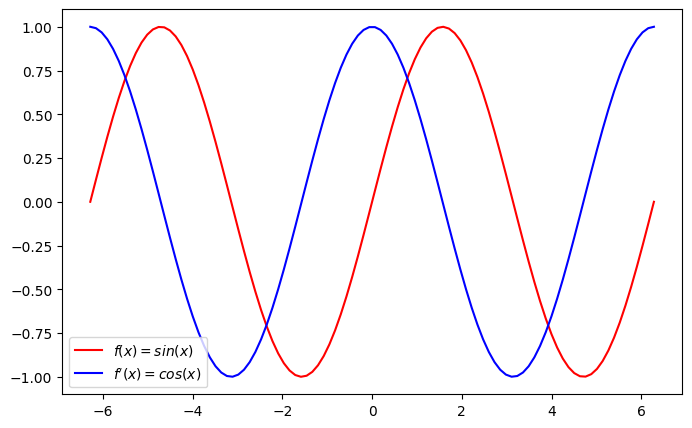

In [49]:
import matplotlib.pyplot as plt

f = lambda x: torch.sin(x)

x = torch.linspace(-2*torch.pi, 2*torch.pi, 100, requires_grad = True)
y = f(x)

y.sum().backward()

f_der = x.grad

x = x.detach().numpy()
y = y.detach().numpy()
f_der = f_der.detach().numpy()

plt.figure(figsize = (8, 5))
plt.plot(x, y, color = 'red', label = '$f(x) = sin(x)$')
plt.plot(x, f_der, color = 'blue', label = '$f\'(x) = cos(x)$')
plt.legend()

5. Let $f(x) = ((log x^2) sinx) + x^{-1}$. Write out a dependency graph tracing results from $x$ to $f(x)$. \\
\begin{cases}
 x \rightarrow x^{-1} \\
 x \rightarrow  2logx \\
 x \rightarrow sinx
\end{cases}
$$\Rightarrow (2logx)sinx \Rightarrow + x^{-1}$$

8. When might you want to use forward, and when backward, differentiation? Hint: consider the amount of intermediate data needed, the ability to parallelize steps, and the size of matrices and vectors involved.
- Forward differentiation might be useful when there are few inputs but many outputs, while backward is useful for big-data analysis.
